# Tarea 1: Reconocimiento de patrones y aprendizaje automatizado
### Avendaño García Erick Giovanni

## Ejercicio 1:
 ### $\textbf{ a) ¿Qué tipos de problema se pueden resolver con una regresión?}$
 

 
Las regresiones son utilizadas para modelar una relación entre una variable que depende (variable dependiente) de una o más variables independientes.

### $\textbf{b) ¿La siguiente ecuación es un modelo de regresión lineal?}$
$$Y= \beta_0 + \beta_1 X_1 + \beta_2 X_2^2$$

No, no lo es. La ecuación representa un modelo cuadrático. Una regresión se considera líneal cuando la o las variables independientes y los parámetros se encuentran en una relación lineal cosa que no se satisface para $X_2^2$ ya que se encuentra elevada al cuadrado.


### $\textbf{c) En regresión lineal, ¿Cómo se define e interpreta el coeficiente R^2?}$

$R^2$ se puede interpretar como un porcentaje, el cual expresa la varianza de los datos de $y$ que pueden ser explicados a través de su relación lineal con los datos $x$.

### $\textbf{d) ¿Es conveniente utilizar el valor } R^2 \textbf{ en regresión no lineal? En caso contrario, ¿qué 
métrica o valor se puede utilizar?}$

Para una función no lineal del tipo $f:\mathbb{R}^n \to \mathbb{R}$, lo correcto es considerar la función de error, también conocida como la suma de los residuales. Esta función considera un vector de coeficientes $\hat{c}$ y los residuales dados por $r_i = y_i - f(\hat{x}_i)$, teniendo 

$$
E(c) = \sum (y_i - f(\hat{x}_i))^2
$$

la cual es aplicable para todo tipo de función de este estilo.


### $\textbf{e) ¿Qué es el sobre entrenamiento en una regresión?}$

El sobreentrenamiento (overfitting) en una regresión ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento, capturando no solo la tendencia general sino también ruido o fluctuaciones aleatorias. Como resultado, el modelo tiene un alto desempeño en los datos con los que fue entrenado, pero generaliza mal a nuevos datos.

### $\textbf {f) Supongamos que los resultados de una regresión muestran que el coeficiente de regresión
es R^2 = 1. 

¿Podría este modelo estar sobre entrenado? Justifica tu respuesta.}$

Podría estarlo, ya que no es muy común, ni siquiera en los experimentos de más alta precisión, obtener un $R^2=1$. Se debería observar los nuevos datos y ver qué ocurre con ellos. Si son clasificados de forma correcta, el modelo no estaría sobreentrenado, de clasificarlos muy mal, lo estaría.

### $\textbf {g) En Python, define una función llamada pearson correlation(x,y) que recibe dos\\
 conjuntos de datos (columnas de un DataFrame) y devuelve la correlación de Pearson}
$$r_{xy}$.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import stats
def correlation (x,y):
    x=np.array(x)
    y=np.array(y)
    return stats.pearsonr(x,y)[0]

### $$\textbf{h) Usando los datos del archivo crime.csv, y la función del inciso anterior. Encuentre 
cuáles variables están correlacionadas (o anticorrelacionadas) a través de una matriz de 
correlación.}$$

In [3]:
df= pd.read_csv("/Users/erickavendanogarcia/Downloads/crime.csv")

In [4]:
def correlation_matrix(data):
    # Seleccionar las columnas desde la columna 6 hasta la penúltima menos 27
    data = data.iloc[:, 4:-1]

    # Convertir todas las columnas a numéricas, reemplazando valores no numéricos con NaN
    data = data.apply(pd.to_numeric, errors='coerce')
    #Vamos a borrar los valores Nan
    data = data.dropna()

    variables = data.columns
    n = len(variables)
    corr_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            corr_matrix[i, j] = correlation(data[variables[i]], data[variables[j]])

    return corr_matrix

In [5]:
correlation_matrix(df)

/var/folders/hb/c3zh8bns0mx4nw98_6k7rx8m0000gn/T/ipykernel_16801/2789933752.py:5: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  return stats.pearsonr(x,y)[0]


array([[ 1.00000000e+00,  2.27908913e-02,  5.51418117e-02, ...,
        -3.95393621e-02,  6.82207218e-03,  3.71319701e-02],
       [ 2.27908913e-02,  1.00000000e+00,  3.93181713e-03, ...,
         1.00012192e-01, -1.87870387e-01, -4.64939687e-02],
       [ 5.51418117e-02,  3.93181713e-03,  1.00000000e+00, ...,
        -7.84081148e-04, -8.25361075e-03, -1.52602525e-01],
       ...,
       [-3.95393621e-02,  1.00012192e-01, -7.84081148e-04, ...,
         1.00000000e+00, -3.55426652e-02, -2.11000888e-02],
       [ 6.82207218e-03, -1.87870387e-01, -8.25361075e-03, ...,
        -3.55426652e-02,  1.00000000e+00,  4.21853047e-02],
       [ 3.71319701e-02, -4.64939687e-02, -1.52602525e-01, ...,
        -2.11000888e-02,  4.21853047e-02,  1.00000000e+00]])

## Ejercicio 2:
$\textbf{Peso y Características (5 pts). El archivo fish.csv contiene los datos de 7 diferentes 
especies de pescado.\\
 
Las características registradas corresponden al peso (gramos), ancho
(cm) y 4 clases diferentes de longitud en cm.\\
 (las longitudes dependen de la forma en que se
 toma la medida en el pescado). \\

Realice los siguientes ejercicios}:$


### $$\textbf{a) Calcule el coeficiente de correlación de Pearson para encontrar la variable más correlacionada con el peso.}$$



In [6]:
df1= pd.read_csv("/Users/erickavendanogarcia/Downloads/fish.csv")

In [7]:
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [8]:
correlation(df1.Weight,df1.Length3)

/var/folders/hb/c3zh8bns0mx4nw98_6k7rx8m0000gn/T/ipykernel_16801/2789933752.py:5: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  return stats.pearsonr(x,y)[0]


0.9230435593620118

In [9]:
# Calcular la correlación con "Weight" solo para columnas numéricas
correlaciones = {i: correlation(df1["Weight"], df1[i]) for i in df1.columns if i != "Weight" and i!= "Species"}


# Encontrar la variable con mayor correlación
variable_mas_correlacionada = max(correlaciones, key=correlaciones.get)
#si ponemos el max sin el key seleccionará la última variable en orden alfabético en lugar de la más correlacionada
valor_correlacion = correlaciones[variable_mas_correlacionada]

/var/folders/hb/c3zh8bns0mx4nw98_6k7rx8m0000gn/T/ipykernel_16801/2789933752.py:5: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  return stats.pearsonr(x,y)[0]


In [10]:
correlaciones

{'Length1': 0.9157117160312037,
 'Length2': 0.9186177013642209,
 'Length3': 0.9230435593620118,
 'Height': 0.7243453291993313,
 'Width': 0.8865066052433445}

In [11]:
print("La variable más correlacionada es ", variable_mas_correlacionada,"y su valor es:", valor_correlacion)

La variable más correlacionada es  Length3 y su valor es: 0.9230435593620118


$$\textbf {b) Realice una gráfica de puntos con las variables Peso (eje y) vs la variable encontrada 
en el inciso anterior.}$$



<function matplotlib.pyplot.show(close=None, block=None)>

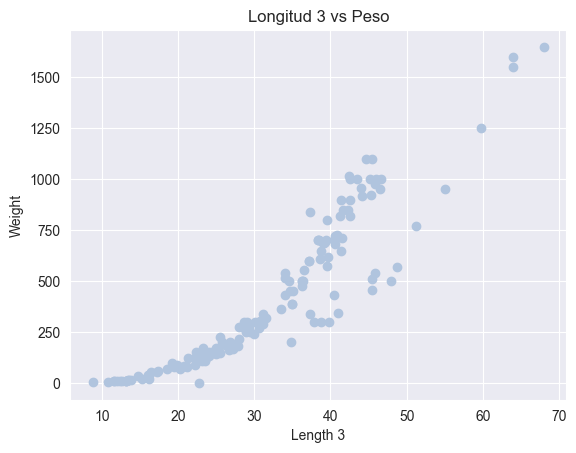

In [12]:
X=df1.Length3
y=df1.Weight
plt.scatter(X,y, color='lightsteelblue')
plt.xlabel("Length 3")
plt.ylabel("Weight")
plt.title("Longitud 3 vs Peso")
plt.show

### $$\textbf {c) Compruebe si la correlación se mantiene para la especie Perch. Realice una regresión 
lineal para calcular el peso de la especie en función de la variable encontrada en el inciso 
a. Proporcione los coeficientes de la regresión.}$$

In [13]:
import sqlite3

# Conectar a SQLite (base de datos en memoria)
conn = sqlite3.connect(':memory:')

# Guardar el DataFrame como una tabla SQL
df1.to_sql('df1', conn, if_exists='replace', index=False)

# Hacer una consulta SQL desde la tabla (usar el nombre correcto de la tabla)
query = "SELECT Species, Length3, Weight FROM df1 WHERE Species LIKE '%Perch'"
df_resultado = pd.read_sql(query, conn)

In [14]:
df_resultado

,Species,Length3,Weight
0,Perch,8.8,5.9
1,Perch,14.7,32.0
2,Perch,16.0,40.0
3,Perch,17.2,51.5
4,Perch,18.5,70.0
5,Perch,19.2,100.0
6,Perch,19.4,78.0
7,Perch,20.2,80.0
8,Perch,20.8,85.0
9,Perch,21.0,85.0


In [15]:
correlation(df_resultado.Weight,df_resultado.Length3)

/var/folders/hb/c3zh8bns0mx4nw98_6k7rx8m0000gn/T/ipykernel_16801/2789933752.py:5: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  return stats.pearsonr(x,y)[0]


0.9595060788374434

La correlación cambia, de hecho para el pez Pearch la correlación es más alta entre la longitud y el peso. Se tiene un valor de $r_{xy}=0.950596$ mientras que la correlación para todos los peces es de $r_{xy}=0.9230435593620118$

In [16]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [17]:
X1 = df_resultado[['Length3']]  # Asegurar que X1 sea un DataFrame (2D)
y1 = df_resultado['Weight']  # y1 puede seguir siendo un Series (1D)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X1, y1) #Le vamos a dar las ecuaciones para entrenar el modelo
lin_reg.intercept_, lin_reg.coef_ #Es la pareja X,y que maximiza la ecuación

(-652.7871372535784, array([35.00089353]))

In [19]:
intercept = lin_reg.intercept_  # β0 (ya es un escalar, no necesita [0])
coef = lin_reg.coef_[0]  # β1 (es un array de un solo elemento)

In [20]:
y_pred = lin_reg.predict(X1)

/Library/Python/3.9/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Python/3.9/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


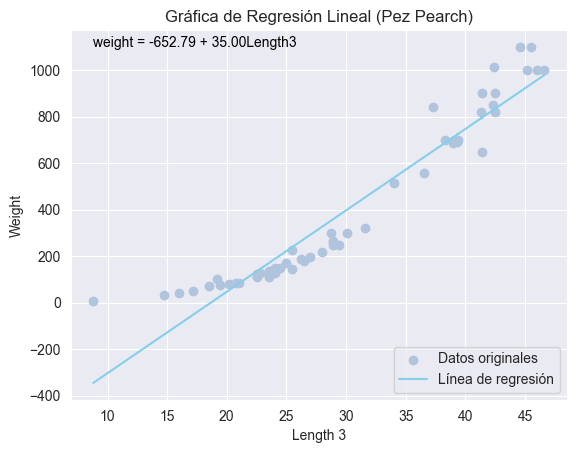

In [21]:
plt.scatter(X1, y1, color="lightsteelblue", label="Datos originales")  # Puntos de datos
plt.plot(X1, y_pred, color="skyblue", label="Línea de regresión")  # Línea de regresión
plt.title("Gráfica de Regresión Lineal (Pez Pearch)")
plt.xlabel("Length 3")
plt.ylabel("Weight")
plt.legend()
equation_text = f"weight = {intercept:.2f} + {coef:.2f}Length3"
plt.text(X1.min(), y1.max(), equation_text, color="black", fontsize=10)
plt.show()

### $$\textbf{d) Calcule e interprete el coeficiente de determinación R^2}$$

In [22]:
# Para calcular R^2 usando sklearn tenemos que llamar a la función Score
r2=lin_reg.score(X1, y1)
r2

0.920651915326006

El modelo tiene una precisión muy buena, donde el 92.06% de la varianza de los datos del peso pueden ser explicados mediante su relación lineal con los datos de la longitud 3. Con ello una alta dependencia.

### $$\textbf {e) Grafique un histograma de los valores residuales de la regresión.}$$

/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


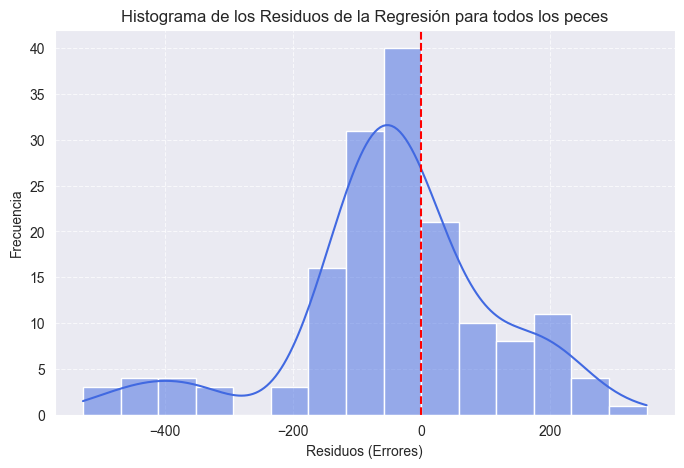

In [23]:
# Calcular los residuos (errores)
y_pred1 = lin_reg.predict(X.values.reshape(-1, 1))  # Convertir X en un array 2D si es necesario
residuos = y - y_pred1  # Diferencia entre valores reales y predichos

# Graficar el histograma
plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=15, kde=True, color="royalblue")  # kde=True dibuja la densidad
plt.axvline(x=0, color='red', linestyle='--')  # Línea en x=0 para referencia
plt.xlabel("Residuos (Errores)")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos de la Regresión para todos los peces")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

/Users/erickavendanogarcia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


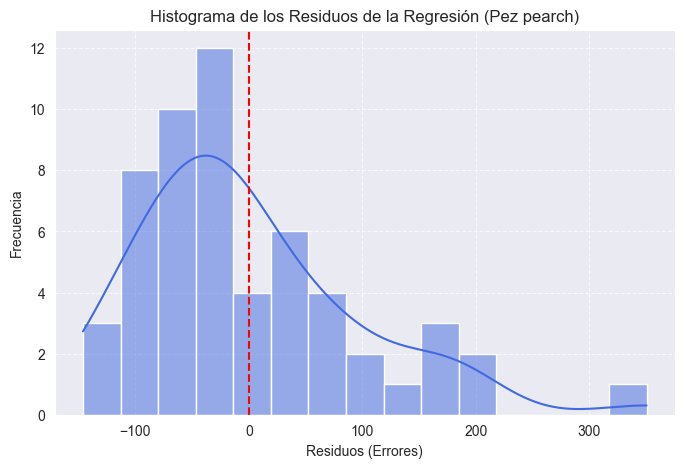

In [24]:
# Calcular los residuos (errores)
y_pred2 = lin_reg.predict(X1.values.reshape(-1, 1))  # Convertir X en un array 2D si es necesario
residuos1 = y1 - y_pred2  # Diferencia entre valores reales y predichos

# Graficar el histograma
plt.figure(figsize=(8, 5))
sns.histplot(residuos1, bins=15, kde=True, color="royalblue")  # kde=True dibuja la densidad
plt.axvline(x=0, color='red', linestyle='--')  # Línea en x=0 para referencia
plt.xlabel("Residuos (Errores)")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos de la Regresión (Pez pearch)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### $$\textbf{ f ) ¿Cuál es el error esperado al hacer una predicción con este modelo?}$$

Al tener errores negativos podría ser muy conveniente usar el error cuadrático medio o el error medio absoluto.

In [25]:
#Todos los peces
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred1)

In [26]:
print("El error cuadrático medio es:",mse,"\nEl error absoluto medio es:", mae,"\n Y el Rmse:", rmse);

El error cuadrático medio es: 26328.350185151026 
El error absoluto medio es: 117.75205908426479 
 Y el Rmse: 162.26013122499015


In [27]:
# Pez pearch
mse = mean_squared_error(y1, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y1, y_pred2)

In [28]:
print("El error cuadrático medio es:",mse,"\nEl error absoluto medio es:", mae,"\n Y el Rmse:", rmse);

El error cuadrático medio es: 9417.05088542376 
El error absoluto medio es: 74.68218566021952 
 Y el Rmse: 97.04149053587213


### $$\textbf{g) Calcule y grafique un intervalo de confianza de la regresión con un valor de confianza 
de 90\%.}$$

In [29]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Pez pearch

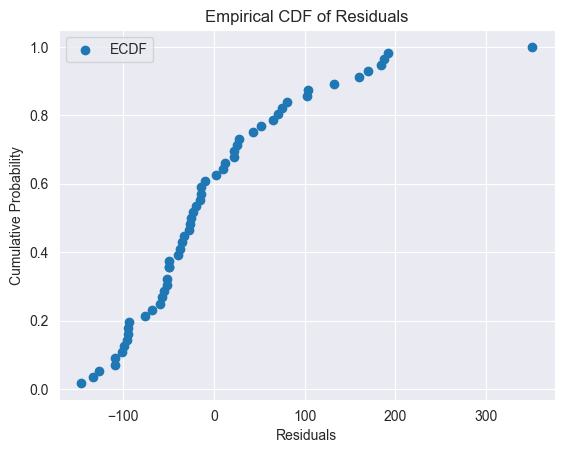

In [30]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(residuos1)

# Graficar
plt.scatter(residuos1, ecdf(residuos1), label="ECDF")
plt.xlabel("Residuals")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF of Residuals")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
r0 = residuos1[np.searchsorted(ecdf(residuos1), 0.9)]
r0

183.74925156825464

/Library/Python/3.9/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Library/Python/3.9/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


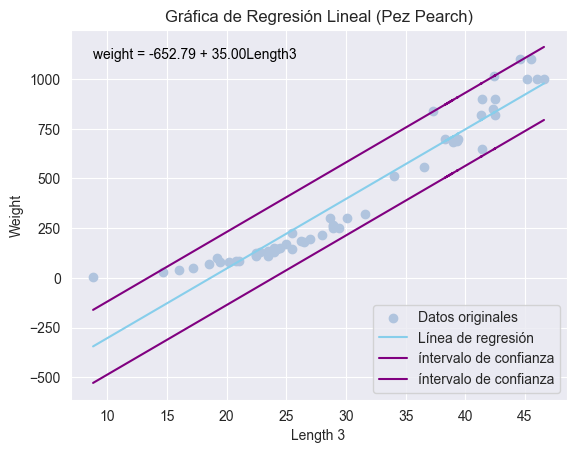

In [32]:
plt.scatter(X1, y1, color="lightsteelblue", label="Datos originales")  # Puntos de datos
plt.plot(X1, y_pred, color="skyblue", label="Línea de regresión")  # Línea de regresión
plt.plot(X1,y_pred+r0, color="purple", label="íntervalo de confianza")
plt.plot(X1,y_pred-r0, color="purple", label="íntervalo de confianza")
plt.title("Gráfica de Regresión Lineal (Pez Pearch)")
plt.xlabel("Length 3")
plt.ylabel("Weight")
plt.legend()
equation_text = f"weight = {intercept:.2f} + {coef:.2f}Length3"
plt.text(X1.min(), y1.max(), equation_text, color="black", fontsize=10)
plt.show()

### Todos los peces

In [33]:
X = df1.Length3.values.reshape(-1, 1)  # Convertir a un array 2D
y = df1.Weight.values  # y sigue siendo 1D
lin_reg.fit(X, y)  #Le vamos a dar las ecuaciones para entrenar el modelo

LinearRegression()

In [34]:
lin_reg.intercept_, lin_reg.coef_  #Es la pareja X,y que maximiza la ecuación
intercept1 = lin_reg.intercept_  # β0 (ya es un escalar, no necesita [0])
coef1 = lin_reg.coef_[0]  # β1 (es un array de un solo elemento)
y_pred3 = lin_reg.predict(X)

In [35]:
#Valor para los peces normales
ecdf1 = ECDF(residuos)
r1 = residuos[np.searchsorted(ecdf1(residuos), 0.89)]
r1

281.47748712618454

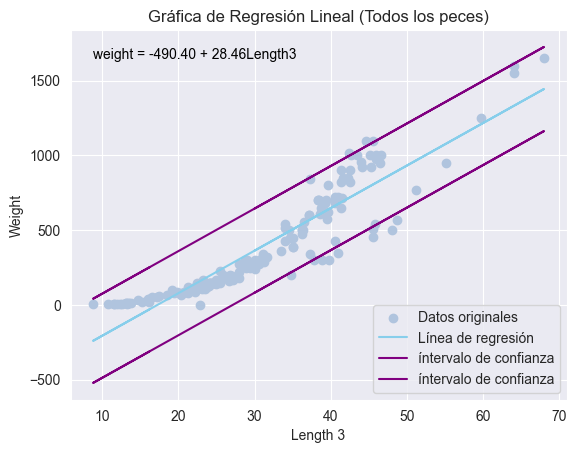

In [36]:
plt.scatter(X, y, color="lightsteelblue", label="Datos originales")  # Puntos de datos
plt.plot(X, y_pred3, color="skyblue", label="Línea de regresión")  # Línea de regresión
plt.plot(X,y_pred3+r1, color="purple", label="íntervalo de confianza")
plt.plot(X,y_pred3-r1, color="purple", label="íntervalo de confianza")
plt.title("Gráfica de Regresión Lineal (Todos los peces)")
plt.xlabel("Length 3")
plt.ylabel("Weight")
plt.legend()
equation_text = f"weight = {intercept1:.2f} + {coef1:.2f}Length3"
plt.text(X.min(), y.max(), equation_text, color="black", fontsize=10)
plt.show()

In [37]:
residuos 

0     -155.239669
1     -149.240741
2      -95.740652
3     -156.742796
4     -107.243243
          ...    
154    195.975164
155    193.675075
156    181.974807
157    140.473556
158    105.672662
Name: Weight, Length: 159, dtype: float64

### $$\textbf{h) Dada una predicción del peso en función de la variable encontrada en el inciso a), ¿cuál 
es la probabilidad de que el error entre el valor observado y la predicción sea menor a 
20 gramos? Justifique su respuesta}$$

In [38]:
#La variable es length 3
from scipy.stats import norm

# Calcular la media y desviación estándar de los errores
mu = np.mean(residuos) #media
sigma = np.std(residuos) #desviación estándar 

# Calcular la probabilidad usando la distribución normal, fijamos 20 gramos en la ecuación
proba = norm.cdf(20, mu, sigma) - norm.cdf(-20, mu, sigma)

print(f"La probabilidad de que el error sea menor a 20 gramos es: {proba *100:.4f}%")

La probabilidad de que el error sea menor a 20 gramos es: 9.7980%


## Ejercicio 3:
Regresión no lineal (5 pts). El archivo data.csv contiene dos columnas, una con la
variable independiente X y la otra con la variable dependiente Y. Realice los siguientes
ejercicios.

### $$\textbf{a) Realice una gráfica de puntos Y vs X que muestre la relación entre ambas variables}$$

In [39]:
df3= pd.read_csv("/Users/erickavendanogarcia/Downloads/data.csv")

In [40]:
X3=df3.x
y3=df3.y

<function matplotlib.pyplot.show(close=None, block=None)>

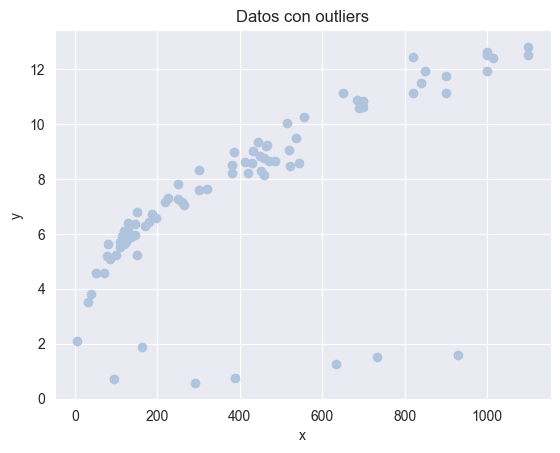

In [41]:
plt.scatter(X3, y3, color="lightsteelblue", label="Datos")
plt.title("Datos con outliers")
plt.xlabel("x")
plt.ylabel("y")
plt.show

### $$\textbf{b) Implemente una forma para identificar y eliminar outliers en este conjunto de datos.}$$

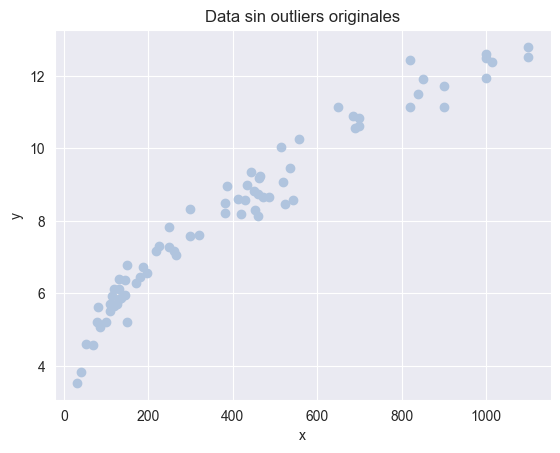

In [42]:
df_sin_out = df3.copy()

while True:
    # Calcular la media y la desviación estándar del DataFrame actual
    mediay = df_sin_out["y"].mean()
    desviaciony = df_sin_out["y"].std()

    # Definir los límites de outliers
    max_perm = mediay +  2* desviaciony
    min_perm = mediay - 2 * desviaciony

    # Filtrar los datos dentro del rango
    df_nuevo = df_sin_out[(df_sin_out["y"] < max_perm) & (df_sin_out["y"] > min_perm)]

    # Si no hay cambios, detener el proceso
    if df_nuevo.shape[0] == df_sin_out.shape[0]:
        break

    df_sin_out = df_nuevo.copy()  # Actualizar el DataFrame


#Graficar
plt.scatter(df_sin_out["x"], df_sin_out["y"], color="lightsteelblue", label="Datos")
plt.title("Data sin outliers originales")
plt.xlabel("x")
plt.ylabel("y")
plt.show ()


### $$\textbf{c) Proponga y grafique un modelo de regresión que describa la relación entre las variables
 X y Y. Proporcione los coeficientes de la regresión.}$$

Por el Teorema de la reducción de la dimensionalidad parece muy atractivo, poder convertir los datos X, Y en su versión logarítmica para así poder tener 
una regresión lineal y poder obtener una expresión que nos permita despejarla más adelante haciendo uso de la exponencial.

In [43]:
y_log=np.log(df_nuevo["y"])
x_log=np.log(df_nuevo["x"])

In [44]:
# Entrenamos el modelo
lin_reg.fit(x_log.values.reshape(-1, 1) , y_log)  #Le vamos a dar las ecuaciones para entrenar el modelo
lin_reg.intercept_, lin_reg.coef_  #Es la pareja X,y que maximiza la ecuación

#Obtenemos los coeficientes
intercept2 = lin_reg.intercept_  # β0 (ya es un escalar, no necesita [0])
coef2 = lin_reg.coef_[0]  # β1 (es un array de un solo elemento)


In [45]:
y_pred4 = lin_reg.predict(x_log.values.reshape(-1, 1))

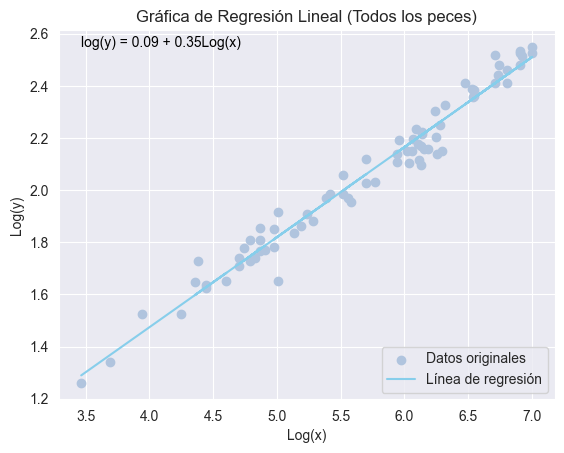

In [46]:
plt.scatter(x_log, y_log, color="lightsteelblue", label="Datos originales")  # Puntos de datos
plt.plot(x_log, y_pred4, color="skyblue", label="Línea de regresión")  # Línea de regresión

plt.title("Gráfica de Regresión Lineal (Todos los peces)")
plt.xlabel("Log(x)")
plt.ylabel("Log(y)")
plt.legend()
equation_text = f"log(y) = {intercept2:.2f} + {coef2:.2f}Log(x)"
plt.text(x_log.min(), y_log.max(), equation_text, color="black", fontsize=10)
plt.show()

Finalmente, la expresión encontrada después de despejar la "y" es:

$$y=e^{0.09}x^{0.35}$$

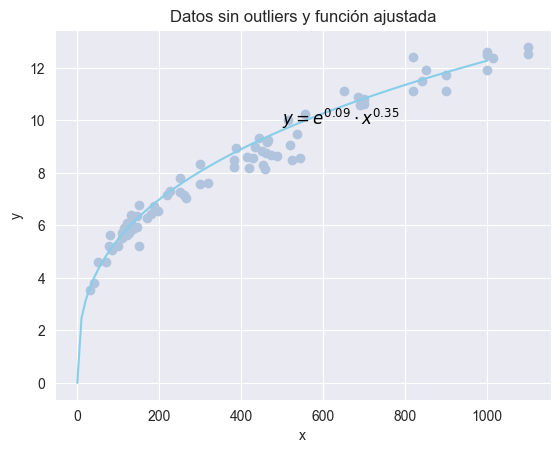

In [47]:
a=np.linspace(0,1000,100)
plt.plot(a, np.exp(0.09)*a**(0.35), color="skyblue")
plt.scatter(df_sin_out["x"], df_sin_out["y"], color="lightsteelblue", label="Datos")
plt.title("Datos sin outliers y función ajustada")
plt.xlabel("x")
plt.ylabel("y")
equation_text = r"$y = e^{0.09} \cdot x^{0.35}$"
plt.text(500, max(np.exp(0.09) * a**0.35)*0.8, equation_text, fontsize=12, color="black")
plt.show ()


### $$\textbf{d) Obtén el coeficiente de determinación R^2 e interpreta}$$

In [48]:
y_predict = np.exp(0.09) *df_sin_out["x"]**0.35

r2=r2_score(df_sin_out["y"],y_predict)

In [49]:
r2 

0.9601678906462704

El 96.016% de la varianza de los datos pueden ser explicados mediante la relación $y=e^{0.09}x^{0.35}$ con los datos x. Claramente, después de eliminar los outliers. Si no el valor sería mucho menor, aproximadamente en 40.46%.

### $$\textbf {e) Grafique el histograma de residuales para este modelo}$$

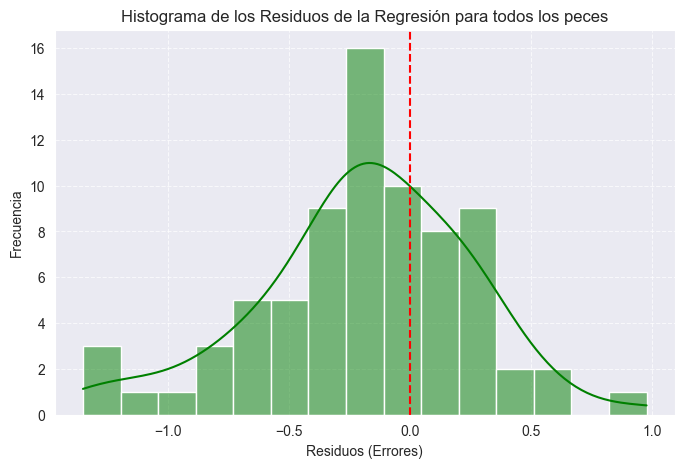

In [50]:
# Calcular los residuos (errores)

residuos_nolineal = df_sin_out["y"] - y_predict  # Diferencia entre valores reales y predichos

# Graficar el histograma
plt.figure(figsize=(8, 5))
sns.histplot(residuos_nolineal, bins=15, kde=True, color="green")  # kde=True dibuja la densidad
plt.axvline(x=0, color='red', linestyle='--')  # Línea en x=0 para referencia
plt.xlabel("Residuos (Errores)")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos de la Regresión para todos los peces")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### $$\textbf{f ) ¿Cuál es el error esperado al hacer una predicción con este modelo de regresión?}$$

In [51]:
mse = mean_squared_error(df_sin_out["y"], y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_sin_out["y"], y_predict)
print("El error cuadrático medio es:",mse,"\nEl error absoluto medio es:", mae,"\n Y el Rmse:", rmse);

El error cuadrático medio es: 0.23027916627627718 
El error absoluto medio es: 0.36653561847923855 
 Y el Rmse: 0.47987411503047045


### $$ \textbf{ g) ¿Cuál es el valor máximo de error que podemos esperar el 80\% de las veces?}$$

In [52]:
np.percentile(residuos_nolineal, 80)

0.16866781386930665

In [53]:
#Asumiendo que sigue una distribución normal los errores
from scipy.stats import norm
mu1 = np.mean(residuos_nolineal)
sigma1= np.std(residuos_nolineal)  # Desviación estándar muestral

# Percentil 80 basado en la normal
z_80 = norm.ppf(0.80)
error_80 = mu1 + z_80 * sigma1

In [54]:
error_80

0.17929110885509109

## Ejercicio 4:

### $$\textbf{a) Realice una gráfica de puntos Y (costo seguro) vs las demás variables que conforman al 
conjunto de datos.}$$

In [55]:
df4= pd.read_csv("/Users/erickavendanogarcia/Downloads/costos.csv")

In [56]:
df4

,edad,genero,imc,num_hijos,fumador,region,costo_seguro
0,19,0,27.900,0,1,suroeste,16884.92400
1,18,1,33.770,1,0,sureste,1725.55230
2,28,1,33.000,3,0,sureste,4449.46200
3,33,1,22.705,0,0,noroeste,21984.47061
4,32,1,28.880,0,0,noroeste,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,noroeste,10600.54830
1334,18,0,31.920,0,0,noreste,2205.98080
1335,18,0,36.850,0,0,sureste,1629.83350
1336,21,0,25.800,0,0,suroeste,2007.94500


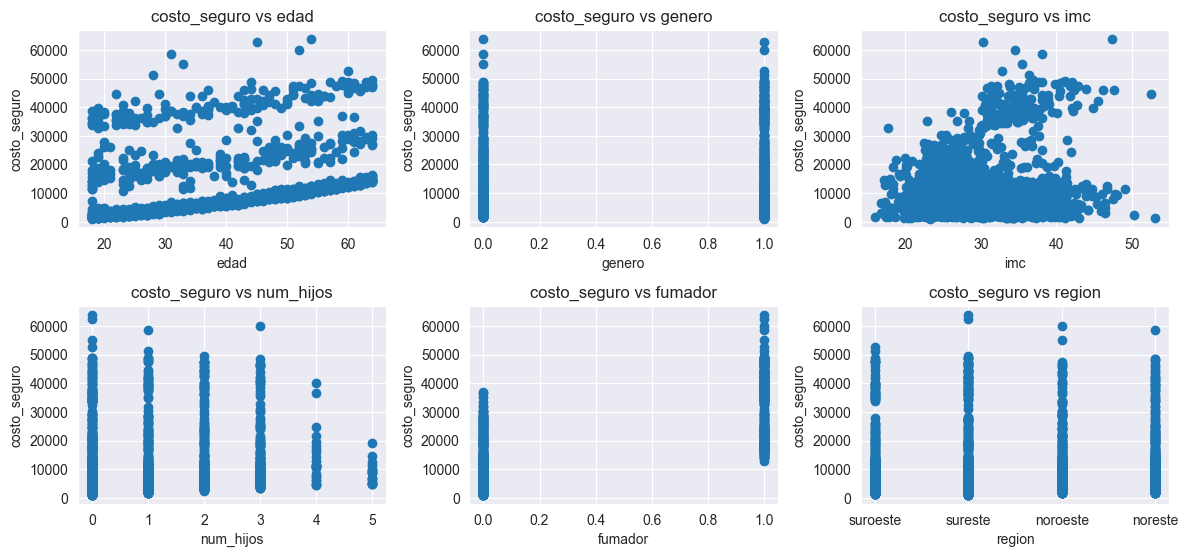

In [57]:
col_y = 'costo_seguro'
cols_x = [col for col in df4.columns if col != col_y]

# Crear una figura
plt.figure(figsize=(12, 8))

# Crear subgráficas (una por cada columna en x)
for i, col_x in enumerate(cols_x, 1): #Un i recorre el número de columnas, el otro las columnas
    plt.subplot(3, 3, i)  # Aquí definimos una cuadrícula 3x3 de subgráficas
    plt.scatter(df4[col_x], df4[col_y])  # Gráfico de dispersión
    plt.title(f'{col_y} vs {col_x}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)

# Ajustar el diseño
plt.tight_layout()
plt.show()

### $$\textbf{b) Proponga y grafique un modelo de regresión que prediga el costo de la póliza, como
 función del resto de las variables.}$$

In [58]:
# En la limpieza de datos, usualmente las cadenas de texto se le asignan valores para poder manipularlas, es lo que haremos con región
df4['region'] = df4['region'].replace({'suroeste': 0, 'sureste': 1, 'noroeste': 2, 'noreste': 3})

/var/folders/hb/c3zh8bns0mx4nw98_6k7rx8m0000gn/T/ipykernel_16801/1355427336.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['region'] = df4['region'].replace({'suroeste': 0, 'sureste': 1, 'noroeste': 2, 'noreste': 3})


In [59]:
X0=df4[['edad','genero','imc','num_hijos','fumador', 'region']]
y0=df4['costo_seguro']

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X0, y0) #Le vamos a dar las ecuaciones para entrenar el modelo
lin_reg.intercept_, lin_reg.coef_ #Es la pareja X,y que maximiza la ecuación

(-12876.372370907891,
 array([  257.28807486,  -131.11057962,   332.57013224,   479.36939355,
        23820.43412267,   353.64001656]))

In [61]:
intercept0 = lin_reg.intercept_  # β0 (ya es un escalar, no necesita [0])
coef0 = lin_reg.coef_[0]  # β1 (es un array de un solo elemento)
y_pred0 = lin_reg.predict(X0)
y_pred0 

array([25111.24186363,  3687.60517284,  6963.14570669, ...,
        4363.66236622,  1106.98661296, 37013.72809551])

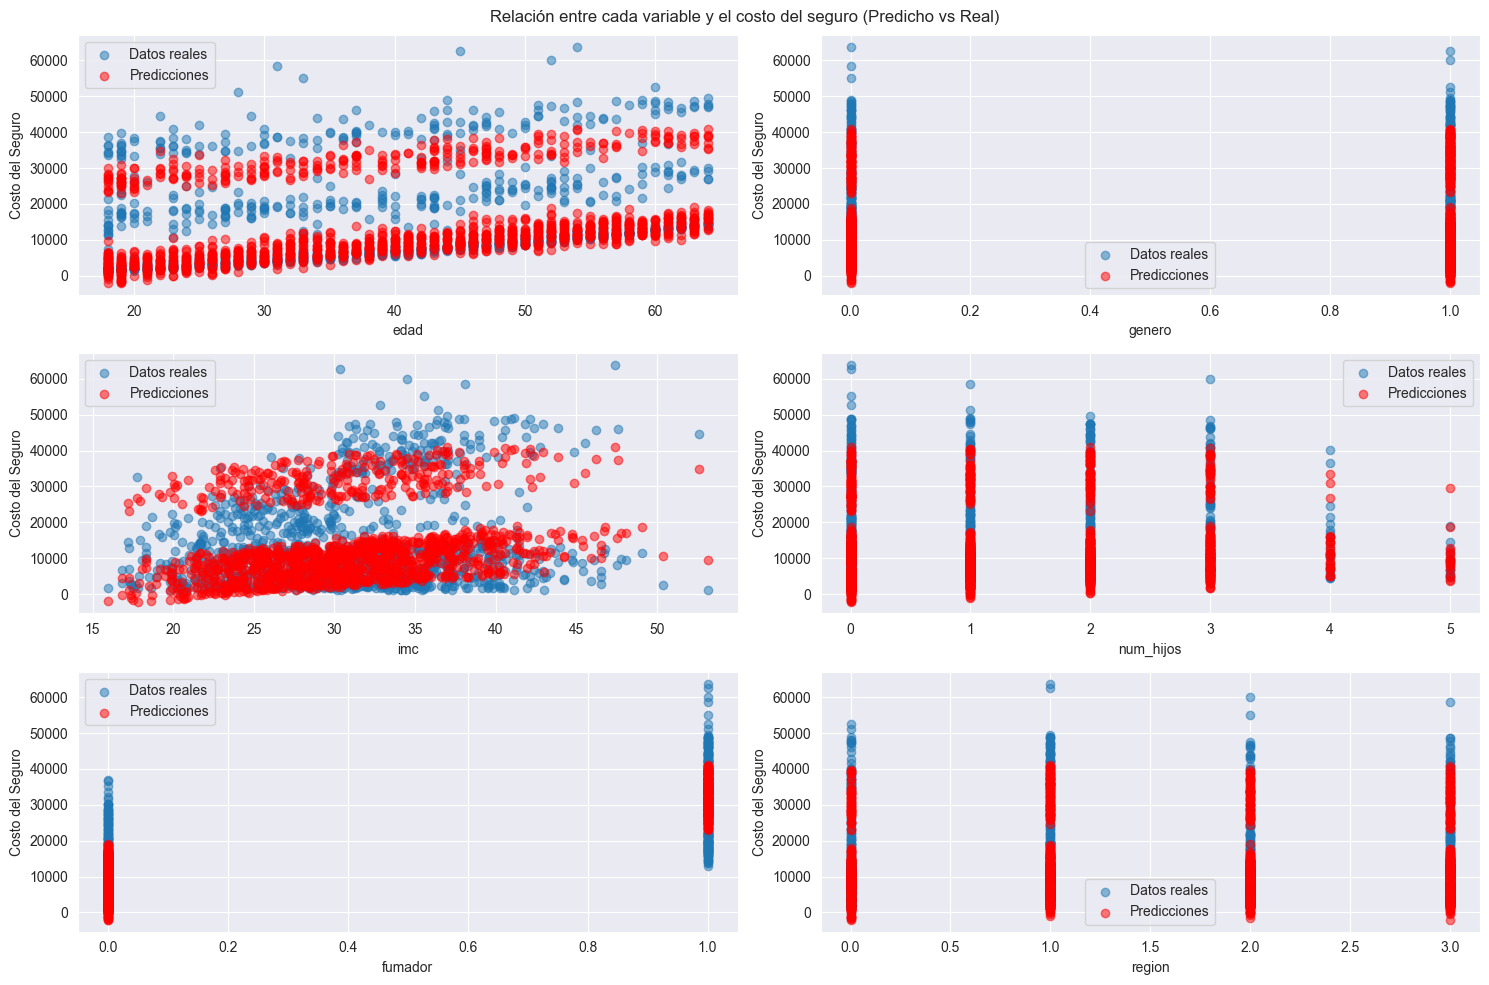

In [62]:
variables = ['edad', 'genero', 'imc', 'num_hijos', 'fumador','region']


plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(3, 2, i + 1)  # Crea una matriz de subgráficos
    plt.scatter(X0[var], y0, label="Datos reales", alpha=0.5)
    plt.scatter(X0[var], y_pred0, label="Predicciones", alpha=0.5, color='red')
    plt.xlabel(var)
    plt.ylabel("Costo del Seguro")
    plt.legend()

plt.suptitle("Relación entre cada variable y el costo del seguro (Predicho vs Real)")
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

# Crear un nuevo DataFrame con las variables y las salidas reales y predichas
df_corr = X0.copy()
df_corr['costo_real'] = y0
df_corr['costo_predicho'] = y_pred0

# Correlación de Pearson
correlaciones = df_corr.corr(numeric_only=True)

# Mostrar correlaciones con la variable objetivo
print("Correlación con el costo real del seguro:")
print(correlaciones['costo_real'].sort_values(ascending=False))

print("\nCorrelación con el costo predicho del seguro:")
print(correlaciones['costo_predicho'].sort_values(ascending=False))


Correlación con el costo real del seguro:
costo_real        1.000000
costo_predicho    0.866451
fumador           0.787251
edad              0.299008
imc               0.198341
num_hijos         0.067998
genero            0.057292
region            0.006208
Name: costo_real, dtype: float64

Correlación con el costo predicho del seguro:
costo_predicho    1.000000
fumador           0.908593
costo_real        0.866451
edad              0.345095
imc               0.228912
num_hijos         0.078479
genero            0.066123
region            0.007165
Name: costo_predicho, dtype: float64


In [64]:
from scipy.stats import pointbiserialr, spearmanr, pearsonr

for col in X0.columns:
    if X0[col].nunique() == 2:  # Binaria
        corr, _ = pointbiserialr(X0[col], y0)
        print(f"Point Biserial corr ({col} vs costo_real): {corr:.2f}")
    elif col in ['region', 'num_hijos']:  # Ordinal categórica
        corr, _ = spearmanr(X0[col], y0)
        print(f"Spearman corr ({col} vs costo_real): {corr:.2f}")
    else:  # Numérica
        corr, _ = pearsonr(X0[col], y0)
        print(f"Pearson corr ({col} vs costo_real): {corr:.2f}")


Pearson corr (edad vs costo_real): 0.30
Point Biserial corr (genero vs costo_real): 0.06
Pearson corr (imc vs costo_real): 0.20
Spearman corr (num_hijos vs costo_real): 0.13
Point Biserial corr (fumador vs costo_real): 0.79
Spearman corr (region vs costo_real): 0.04


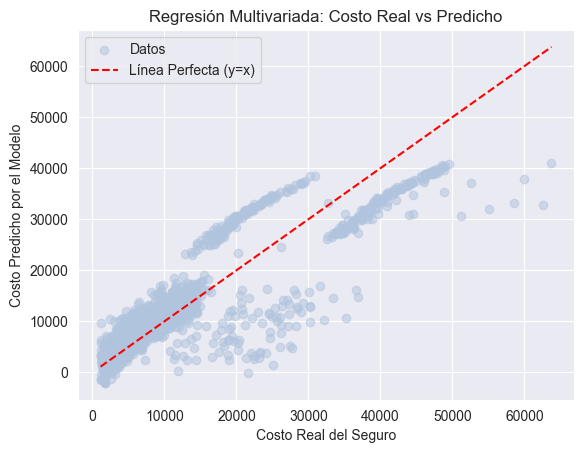

In [65]:
plt.scatter(y0, y_pred0, color="lightsteelblue", alpha=0.5, label="Datos")
plt.plot([y0.min(), y0.max()], [y0.min(), y0.max()], color="red", linestyle="--", label="Línea Perfecta (y=x)")

plt.xlabel("Costo Real del Seguro")
plt.ylabel("Costo Predicho por el Modelo")
plt.title("Regresión Multivariada: Costo Real vs Predicho")
plt.legend()
plt.show()

### $$\textbf {c) Obtén el coeficiente de determinación R^2 e interpreta}$$

In [66]:
r_multivariada= r2_score(y0, y_pred0) 

In [67]:
r_multivariada

0.7507372027994939

Solamente el $75.07\%$ de la varianza del costo de las pólizas de seguro pueden ser explicadas mediante su regresión multivarida con los datos $X$.

$$ \textbf {d ) ¿Cómo encontraría las variables más importantes para predecir el costo de la póliza?}$$

Así como en el ejercicio número 1, sería muy conveniente calcular el coeficiente de pearson entre estas variables para determinar cuales son las más importantes para predecir el costo de la póliza. Entonces repliquemos el método:

In [68]:
correlaciones_poliza = {i: correlation(df4["costo_seguro"], df4[i]) for i in df4.columns if i != "costo_seguro" }

/var/folders/hb/c3zh8bns0mx4nw98_6k7rx8m0000gn/T/ipykernel_16801/2789933752.py:5: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  return stats.pearsonr(x,y)[0]


In [69]:
correlaciones_poliza

{'edad': 0.2990081933306477,
 'genero': 0.05729206220202539,
 'imc': 0.19834096883362898,
 'num_hijos': 0.06799822684790485,
 'fumador': 0.7872514304984772,
 'region': 0.006208234909444455}

Aplicando la correlación de Pearson observamos que las variables género, región y número de hijos no presentan ninguna correlación por lo tanto pueden ser descartables. Inclusive edad y número de hijos presentan una correlación baja, no son descartadas ya que veríamos que el costo de la póliza únicamente dependería si es fumador o no.

### $$\textbf {e) ¿Cuál es el error esperado al hacer una predicción con este modelo de regresión?}$$

In [71]:
residuos_multivariado = y0 - y_pred0

mse = np.mean((residuos_multivariado) ** 2)
mse  

36527659.885682374

In [72]:
mse = mean_squared_error(y0, y_pred0)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y0, y_pred0)
print("El error cuadrático medio es:",mse,"\nEl error absoluto medio es:", mae,"\n Y el Rmse:", rmse);

El error cuadrático medio es: 36527659.885682374 
El error absoluto medio es: 4172.487114944049 
 Y el Rmse: 6043.8117017063305


### $$\textbf{ f ) ¿Cuál es el valor máximo de error que podemos esperar el 90\% de las veces?}$$

In [73]:
mu_mult = np.mean(residuos_multivariado)
sigma1_mult = np.std(residuos_multivariado)  # Desviación estándar muestral

# Percentil 80 basado en la normal
z_90 = norm.ppf(0.90)
error_90 = mu_mult + z_90 * sigma1_mult
error_90

7745.456348178529